In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
'''This is to display all plots in the same notebook'''

'This is to display all plots in the same notebook'

In [5]:
df=pd.read_csv('height-weight.csv')
'''If the file is in the same location. then only file name is required'''

'If the file is in the same location. then only file name is required'

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


# before going to modelling we should understand the relation between the indept & dept variable. So scatter plot can be used.

Text(0, 0.5, 'height')

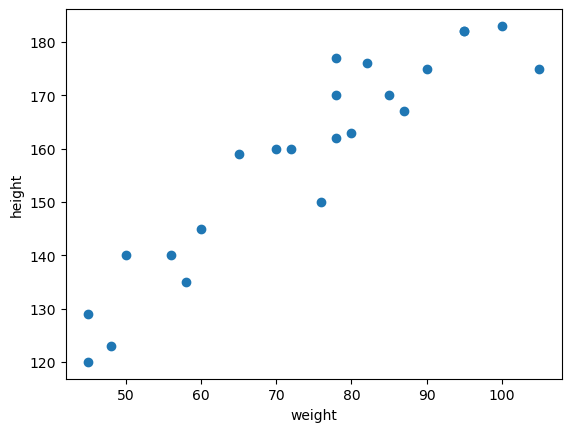

In [7]:
# scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [8]:
# correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


C:\Users\rajka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


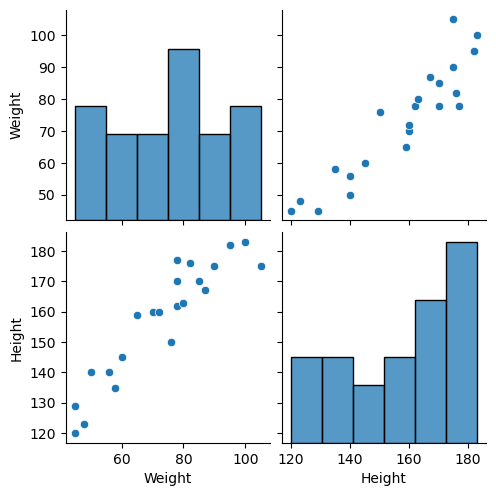

In [9]:
import seaborn as sns
sns.pairplot(df)

In [10]:
# Independent and Dependent features
df.head()
X= df[['Weight']]
Y=df['Height']
# X is of type Series if only 1 bracket is there. It is of type dataframe or a 2D array with 2 brackets
X.shape
# np.array(X).shape


(23, 1)

In [11]:
X1=df['Weight']
np.array(X).shape
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


# TRAIN TEST SPLIT

In [12]:
from sklearn.model_selection import train_test_split


In [27]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [18]:
x_train.shape

(17, 1)

In [28]:
x_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


# STANDARDISATION tHE unit of x & y axis are different that is kg and cms. 
as we use gradient descent the larger value has to descent and reach the global minimum. It takes time to descent is the value is huge. So in standardisation we apply the formula of Z_Score to the data points. Z_score = (xi-mean)/standard deviation. So all the data points will be transformed such that the mean becomes zero and the standard deviation becomes 1


In [29]:
x_train.mean()

Weight    72.470588
dtype: float64

In [30]:
x_train.describe()

# (input-72.47)/17.051

,Weight
count,17.000000
mean,72.470588
std,17.015132
min,45.000000
25%,58.000000
50%,76.000000
75%,85.000000
max,100.000000


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_train
# This nothing but z score
# (input-72.47)/17.051

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

fit transform is used only for x_train. for x_test only transform is used. bcz the mean adnd standard deviation used during fit_transform will be used on the x_test. This is also to avoid dataleakage. So, that the training set knows nothing about
the test set

In [33]:
x_test=scalar.transform(x_test)
# (test-72.47)/17.051

In [34]:
x_test
# This is the z score of x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

# APPLY LINEAR REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regression = LinearRegression(n_jobs=-1)

In [37]:
regression.fit(x_train,y_train)

# Here through gradient decsent method they find the slope and intercept that gives the minimum error

LinearRegression(n_jobs=-1)

In [38]:
regression.coef_

array([17.2982057])

In [39]:
regression.intercept_

156.47058823529412

In [40]:
regression.rank_

1

This means one unit movement with respect to x axis will cause 17.2 times the movement in Y axis
y=mx +c
c is the intercept 
Now lets plot the best fit line

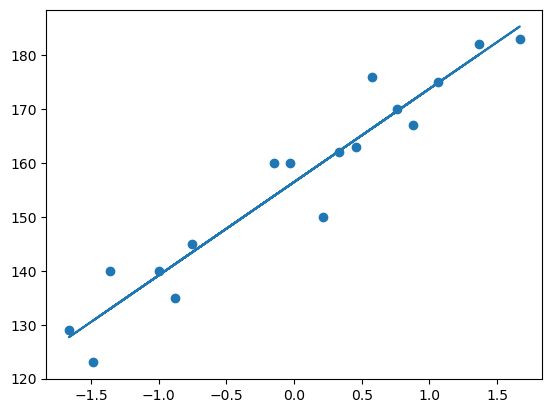

In [41]:
plt.scatter(x_train,y_train)
# Now, to plot the regression line
plt.plot(x_train,regression.predict(x_train))
# So here from this we can know that the predictions are ok. The error is less

In [44]:
# Prediction for test data
y_predict=regression.predict(x_test)
# x_test is already transformed
y_predict

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

# PERFORMANCE MATRIX

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [46]:
mse=mean_squared_error(y_test,y_predict)
mse

114.84069295228699

In [47]:
mae=mean_absolute_error(y_test,y_predict)
mae

9.665125886795005

In [48]:
rmse=np.sqrt(mse)
rmse

10.716374991212605

In [49]:
from sklearn.metrics import r2_score

In [50]:
score=r2_score(y_test,y_predict)
print(score)

0.7360826717981276


# Now lets try doing a prediction for a live input

In [51]:
regression.predict(scalar.transform([[50]]))

C:\Users\rajka\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([132.92309646])

# ********************MULTIPLE LINEAR REGRESSION*****************